In [1]:
# 先import會用到的庫
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

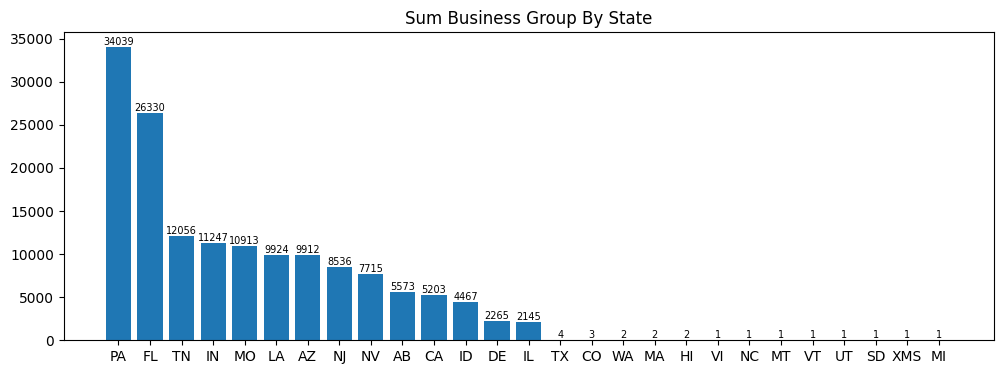

In [2]:
# 將business依照state分組
client = MongoClient('127.0.0.1', 27017)
db = client.Yelp_Original
business = db.business
state = list()
count = list()
condition = [
                {
                    '$group': {
                        '_id': '$state',
                        'count': {'$sum':1}
                    }
                },
                {
                    '$sort': {
                        'count' : -1
                    }
                }
            ]
for r in business.aggregate(condition):
    state.append(r['_id'])
    count.append(r['count'])

plt.figure(figsize=(12,4)) 
plt.bar(range(len(state)), count, tick_label=state)
plt.title('Sum Business Group By State')
for a, b in zip(np.arange(len(state))+1, count):
    plt.text(a-1, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()

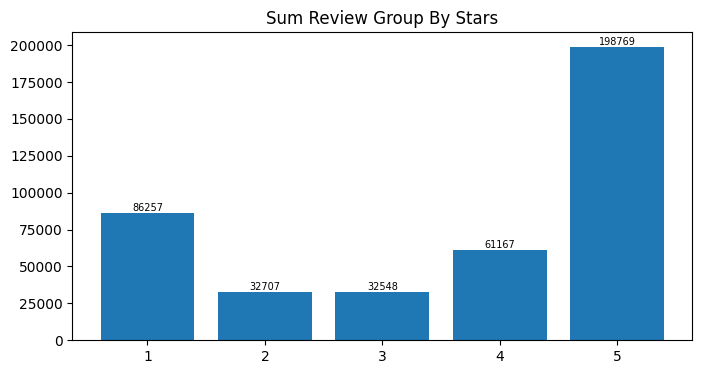

In [2]:
# 將review依照stars分組
client = MongoClient('127.0.0.1', 27017)
db = client.Yelp_New
review = db.review
stars = list()
count = list()
condition = [
                {
                    '$group': {
                        '_id': '$stars',
                        'count': {'$sum':1}
                    }
                },
                {
                    '$sort': {
                        '_id' : 1
                    }
                }
            ]
for r in review.aggregate(condition):
    stars.append(r['_id'])
    count.append(r['count'])

plt.figure(figsize=(8,4)) 
plt.bar(range(len(stars)), count, tick_label=stars)
plt.title('Sum Review Group By Stars')
for a, b in zip(np.arange(len(stars))+1, count):
    plt.text(a-1, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()

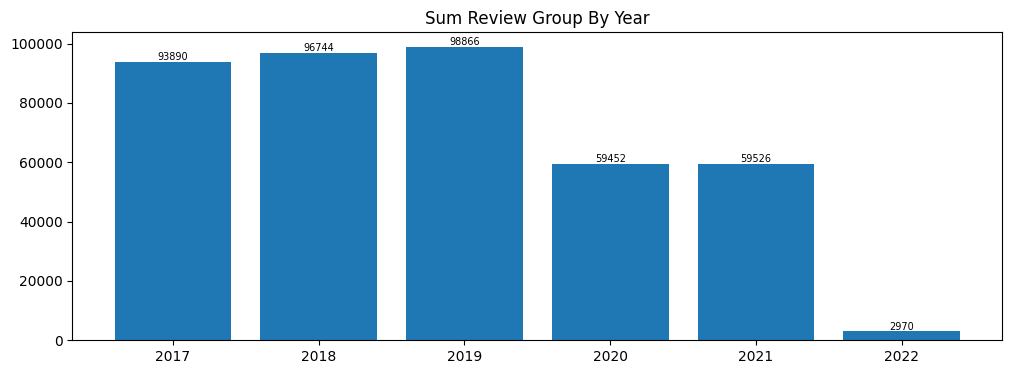

In [5]:
# 將review依照date的年份分組
client = MongoClient('127.0.0.1', 27017)
db = client.Yelp_New
review = db.review
year = list()
count = list()
condition = [
                {
                    '$addFields': {
                        'dateObject': {
                            '$dateFromString': {
                                'dateString': '$date',
                                'format': '%d/%m/%Y %H:%M:%S'
                            }
                        }
                    }
                },
                {
                    '$addFields': {
                        'year': {
                            '$year': '$dateObject'
                        }
                    }
                },
                {
                    '$group': {
                        '_id': '$year',
                        'count': {'$sum':1}
                    }
                },
                {
                    '$sort': {
                        '_id' : 1
                    }
                }
            ]
for r in review.aggregate(condition):
    year.append(r['_id'])
    count.append(r['count'])

plt.figure(figsize=(12,4)) 
plt.bar(range(len(year)), count, tick_label=year)
plt.title('Sum Review Group By Year')
for a, b in zip(np.arange(len(year))+1, count):
    plt.text(a-1, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()

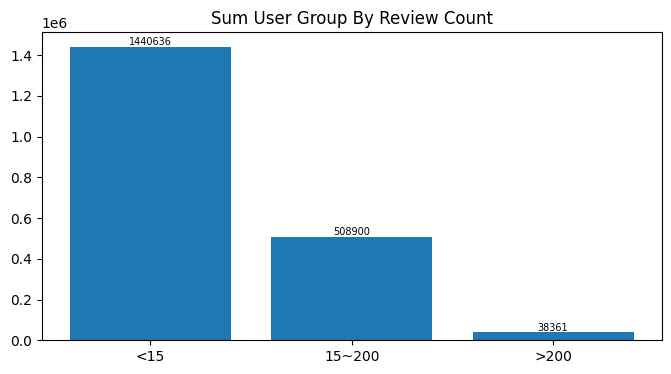

In [5]:
# 將user依照評論數量分三組
client = MongoClient('127.0.0.1', 27017)
db = client.Yelp_Original
user = db.user

condition = [
                {
                    '$group': {
                        '_id': 'null',
                        'lessThan15': {
                            '$sum': {
                                '$cond': [{'$lt': ['$review_count', 15]}, 1, 0]
                            }
                        },
                        'between15And200': {
                            '$sum': {
                                '$cond': [{'$and': [{'$gte': ['$review_count', 15]}, {'$lte': ['$review_count', 200]}]}, 1, 0]
                            }
                        },
                        'greaterThan200': {
                            '$sum': {
                                '$cond': [{'$gt': ['$review_count', 200]}, 1, 0]
                            }
                        }
                    }
                }
            ]
groupedUser = list(user.aggregate(condition))
group = ["<15", "15~200", ">200"]
count = [groupedUser[0]['lessThan15'], groupedUser[0]['between15And200'], groupedUser[0]['greaterThan200']]
plt.figure(figsize=(8,4)) 
plt.bar(range(len(group)), count, tick_label=group)
plt.title('Sum User Group By Review Count')
for a, b in zip(np.arange(len(group))+1, count):
    plt.text(a-1, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()

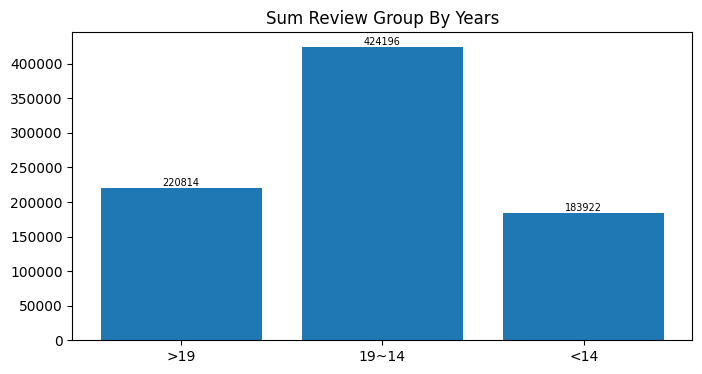

In [5]:
# 將user依照評論數量分三組
client = MongoClient('127.0.0.1', 27017)
db = client.Yelp_New
review = db.review

# condition = [
#                 {
#                     '$group': {
#                         '_id': 'null',
#                         '_24_19': {
#                             '$sum': {
#                                 '$cond': [{'$gte': ['$date', 'new Date("2019-01-01T00:00:00.000Z")']}, 1, 0]
#                             }
#                         },
#                         '_19_14': {
#                             '$sum': {
#                                 '$cond': [{'$and': [{'$gte': ['$date', 'new Date("2014-01-01T00:00:00.000Z")']}, {'$lt': ['$date', 'new Date("2019-01-01T00:00:00.000Z")']}]}, 1, 0]
#                             }
#                         },
#                         '_14': {
#                             '$sum': {
#                                 '$cond': [{'$lt': ['$date', 'new Date("2014-01-01T00:00:00.000Z")']}, 1, 0]
#                             }
#                         }
#                     }
#                 }
#             ]
# groupedReview = list(review.aggregate(condition))
group = [">19", "19~14", "<14"]
count = [220814, 424196, 183922]
plt.figure(figsize=(8,4)) 
plt.bar(range(len(group)), count, tick_label=group)
plt.title('Sum Review Group By Years')
for a, b in zip(np.arange(len(group))+1, count):
    plt.text(a-1, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()